In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder


In [2]:
seed = 42

df = pd.read_csv('Loan_default.csv', index_col=0)


In [3]:
columns_to_encode = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

encoder = OneHotEncoder()

encoded_columns = pd.DataFrame(encoder.fit_transform(df[columns_to_encode]).toarray())

encoded_columns.columns = encoder.get_feature_names_out(input_features=columns_to_encode)

encoded_columns.index = df.index

df_train = pd.concat([df, encoded_columns], axis=1)

df_train.drop(columns=columns_to_encode, inplace=True)

df_train


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Target,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
LoanID,,,,,,,,,,,,,,,,,,,,,
I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,1,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
x = df_train.drop(columns='Target')
y = df_train.Target

cb_x = df.drop(columns='Target')
cb_y = df.Target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)

cb_x_train, cb_x_test, cb_y_train, cb_y_test = train_test_split(cb_x, cb_y, train_size=0.8, random_state=seed)

kf = KFold(n_splits=5, shuffle=True, random_state=seed)


dt_classifier= DecisionTreeClassifier(criterion='gini',
                                      max_depth=3,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      max_features=None,
                                      random_state=42)
dt_cv_scores = cross_val_score(dt_classifier, x_train, y_train, cv=kf,scoring='accuracy')


In [6]:
rf_classifier = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100, random_state=seed)

rf_cv_scores = cross_val_score(rf_classifier, x_train, y_train, cv=kf,scoring='accuracy')

In [7]:
cat_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose','NumCreditLines', 'HasCoSigner']

cb_classifier = CatBoostClassifier(random_seed=seed,
                                   iterations=250,
                                   depth=8,
                                   learning_rate=0.4,
                                   boosting_type='Ordered',
                                   bootstrap_type='Bernoulli',
                                   eval_metric='AUC',
                                   cat_features=cat_features)

cb_cv_scores = cross_val_score(cb_classifier, cb_x_train, cb_y_train, cv=kf, scoring='accuracy')


0:	total: 277ms	remaining: 1m 9s
1:	total: 423ms	remaining: 52.5s
2:	total: 523ms	remaining: 43.1s
3:	total: 644ms	remaining: 39.6s
4:	total: 759ms	remaining: 37.2s
5:	total: 910ms	remaining: 37s
6:	total: 1.04s	remaining: 36.1s
7:	total: 1.13s	remaining: 34.3s
8:	total: 1.29s	remaining: 34.5s
9:	total: 1.43s	remaining: 34.3s
10:	total: 1.53s	remaining: 33.2s
11:	total: 1.6s	remaining: 31.8s
12:	total: 1.73s	remaining: 31.5s
13:	total: 1.87s	remaining: 31.5s
14:	total: 1.92s	remaining: 30.1s
15:	total: 2.03s	remaining: 29.6s
16:	total: 2.13s	remaining: 29.2s
17:	total: 2.23s	remaining: 28.7s
18:	total: 2.37s	remaining: 28.8s
19:	total: 2.47s	remaining: 28.4s
20:	total: 2.56s	remaining: 27.9s
21:	total: 2.73s	remaining: 28.3s
22:	total: 2.77s	remaining: 27.3s
23:	total: 2.87s	remaining: 27s
24:	total: 2.97s	remaining: 26.8s
25:	total: 3.03s	remaining: 26.1s
26:	total: 3.09s	remaining: 25.6s
27:	total: 3.12s	remaining: 24.8s
28:	total: 3.23s	remaining: 24.6s
29:	total: 3.34s	remaining: 2

In [8]:
accuracy_data={"Model":["Decision Tree","Random Forest","Catboost"],
               "Mean Accuracy":[rf_cv_scores.mean(),cb_cv_scores.mean(),dt_cv_scores.mean()],
               "Standard Deviation" :[rf_cv_scores.std(),cb_cv_scores.std(),dt_cv_scores.std()]}
cv_scores=pd.DataFrame(accuracy_data)
cv_scores


,Model,Mean Accuracy,Standard Deviation
0,Decision Tree,0.885234,0.000595
1,Random Forest,0.884862,0.000774
2,Catboost,0.883722,0.000465


## PCA

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np


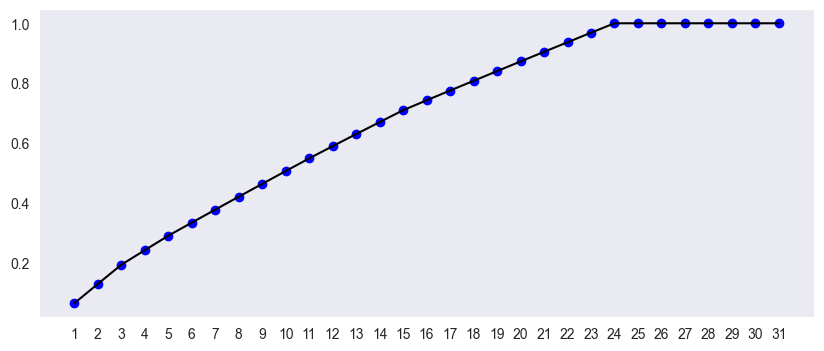

In [10]:
x_train_temp = x_train.copy()
x_test_temp = x_test.copy()
y_train_temp = y_train.copy()
y_test_temp = y_test.copy()

sc = StandardScaler()

x_train_temp = sc.fit_transform(x_train_temp)
x_test_temp= sc.transform(x_test_temp)

pca = PCA(n_components=None)

x_train_temp = pca.fit_transform(x_train_temp)
x_test_temp = pca.fit_transform(x_test_temp)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10,4))
plt.scatter(range(1,32),cumulative_explained_variance,color="blue")
plt.plot(range(1,32),cumulative_explained_variance,color="black")
plt.xticks(range(1,32))
plt.grid()
plt.show()

In [ ]:
### Можно сократить до 23 компонент